<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">


# Week 4 -  Sampling and reconstruction

Most signals of practical interest, such as speech, biometrics, audio and video are effectively analog (continuous). However, modern digital computers work in discrete time step, meaning they cannot ever accurately represent an analog signal with infinitely many values. They instead approximate them by creating a *digital representation* of the signal. An example of this is shown below 

<div style="text-align: center;">
  <img src="images/analog_vs_digital.png"/>
</div>


This conversion from analog to digital can be obtained by sampling the continuous signal at discrete time steps. With uniform (periodic) sampling, there is a fixed  time interval between samples, $T$, called the sampling period. The reciprocal of $T$, $F_s = \frac{1}{T}$, is called the sampling rate (or sampling frequency in hertz). If a computer samples a continuous signal with a period of $0.1 \text{seconds}$, it equates to taking reading of the specific value of that signal at timestep $0.1 s, 0.2 s, 0.3 s, \dots, 0.1 \cdot N s$. The sampling rate (sampling frequency), thus tells us how many samples are generated a second: $F_s = \frac{1}{T} \rightarrow \frac{1}{0.1 s} = 10 \text{ samples} / s$  

---

**At the end of this week, you should be able to:**

- Construct a sinusoidal signal of different frequencies, amplitudes and phases
- Understand how analog (continuous) signals differ from digital (discrete) signals
- Understand how we can sample from an analog signal to create a digital one, and why this is necessary
- Explain what sampling frequency is, and how it relates to signal frequency
- Explain what the nyquist rate is, and why it is important
- Understand what aliasing of signals is, and how it appears when we sample analog signals
- Understand, in broad terms, what an orthonormal basis function is, how we create it, and why it is convenient
- Explain what the amplitude spectrum of a signal is, and how we can use this to reconstruct the original analog signal
- Understand how we can calculate the energy of a signal, and what this represents


**Optional**:
- Understand how we can use sinc-interpolation to reconstruct signals with inadequate sampling 



---

**Mathematically speaking**, let $x_a(t)$ be the value of a signal at time $t$, while $x_d(n)$ is the digital signal sampled from $x_a$.  Assuming that sample $n=0$ is collected at $t=0$, the n'th sample will have the value $x_d(n) = x_a(nT)$.

An an example, consider A simple continious-time signal is the harmonic oscillation, that is described by the sinusoidal (sine wave) curve:

$$ x_a(t) = A\sin(2\pi F\, t +\theta)$$

where $A$ is the amplitude of the sinusoid, F is the frequency in cycles per second (hertz) , and $\theta$ is the phase (in radians). Know, that in some  more mathematical definitions, $2\pi F$ is replaced by $\Omega$, so the frequency is in radians per second (technically more accurate), but cycles per second (how many times a second the sine wave repeats), is most often used.

If we imagine a digital computer samples this signal with a sampling frequency of $F_s = \frac{1}{T}$, we can write the resulting *digital signal* as:

$$ 
x_d(n) = A \sin\left(2\pi\frac{F}{F_s}n + \theta\right)
$$

Which essentially corresponds to marking out specific, equidistant points along the analog signal where we can "ask" the analog signal what it is. In bewteen these points, we either have to calculate or guess.

---

**This leads us to the *sampling theorem***. Notice, that if the frequency of a signal is $F' = F+kF_s$ for some integer $k$, the discrete signal becomes:

$$
x'_d(n) = A\sin\left(2\pi\frac{F+kF_s}{F_s}n + \theta\right)  = A\sin\left(2\pi\frac{F}{F_s}n + 2\pi k n +\theta\right) = A\sin\left(2\pi\frac{F}{F_s}n + \theta\right)
$$

That is, if the "actual" frequency of the signal can be explained as a sum of some other frequency and a whole number times the sampling frequency, the latter part "washes out" and just becomes part of the repeating pattern of the signal. Remember, that since the periodic signal repeats, anyone could shift it an arbitrary number of full cycles, and we'd be none the wiser. 

Such frequencies, $F'$, are called aliases of the frequence $F$ for a given sampling rate $F_s$.  They mean, that we cannot distinguish between the functions  $x'_d(n)$ and  $x_d(n)$. The Shannon-Nyquist sampling theorem states that the contininuous signal can only be properly sampled when the sampling frequency is at least twice the frequency of the signal, ie. $F_s > 2F$. The Nyquist rate is then defined as $F_n = 2 F$.

Effectively, this means, that if we sample a signal *at or below* the Nyquist rate of $2F$, we cannot "guess" the analog signal's true frequency, and even worse, our best guess will be another frequency entirely. This is also a practical problem, since in the real world, we never "know" the frequency of an analog signal before sampling, so we'd never know if we have guessed wrong with the Nyquist rate.

---


### Basically: 

- (Audio) Signals are most often represented as sums of sine waves, each with a given amplitude $A$, frequency $F$ and phase $\theta$
- Since computers and electrical devices (most often) work on a discrete time scale, we **have** to sample the analog signals at discrete time intervals
  - The time between each sample is denoted $T$
  - Often we use the inverse of this $F_s = \frac{1}{T}$ to denote the sampling in **Hertz** (samples per second)
  - When we use sampling to get a digital signal from an analog one, we can only discern different frequencies up to the **nyquist rate**: $2F_s$
    - An example would be a signal with a max frequency of $F_{max} = 10000$, if we sample with a frequency of $F_s = 5000$, we would expect to see other, lower frequencies that aren't actually present (aliases) in the resulting digital signal
- If sampled correctly, all the frequencies of a given signal can be recovered, no matter how they are mixed together 

</span>

<!-- TODO: Consider if the example of the runner running in circles with the viewer timing him makes sense here... -->


</span>

In [1]:
import numpy as np
from IPython.display import Audio
import sounddevice as sd # Can play sounds, only use if IPython.display.Audio does not work
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">


### Playing Audio in notebooks:


To play an audio signal, you can use IPython.display.Audio as such, giving the time signal, which is just a numpy array and a sample rate

`Audio(time_signal, rate = sample_rate)`

UPDATE: Ipython.display.Audio appears to have some problems when using lower sampling rates, we do recommend you use this for these exercises...

Or, if this doesn't work, you can use sounddevice (might need a uv pip install first), here you just give the time_signal as a list-like object, and the sample_rate
You also need to use sounddevice.wait() afterwards, to sleep the process until the sound finishes.

`sd.play(time_signal, samplerate=sample_rate)`

`sd.wait()`

</span>


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 0 - Prelude

(You can skip this exercise if you know how sinusoidal signals behave)

*Just to hammer home some intuition behind sine waves and such, we start out light by showing how different sine waves sound when layered on top of each other. The below code generates a sum of sine waves from a list of frequencies, amplitudes and phases. It then samples said sine waves digitially and plays it back while also plotting the time domain representation and the frequency domain representation (after fourier transform)*

#### **0.1. 💻 Initially, the code creates two different sine waves layered on top of each other. Play around with the amplitudes, frequencies and phases to see if you can discern the two signals from each other, both in the visual plot, and in the sound played.**



#### **0.2. 💻 Normal human speech sits around 90 - 3500 hz range. Play around with layering more sine waves with different frequencies on top of each other, can you make something that doesn't sound annoying to listen to?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

"Annoying to listen to", is a bit general. Probably not, since most "actual sound" is more frequencies layered on top of one another. Even the purest violin note has tons of "Harmonics" (integral multiples of the lowest frequency), and overtones (all other frequencies) layered in. Any sound created by just one frequency will probably always sound "synthetic".

</span>


#### **0.3. 💻 Try changing the sample_rate, three examples are already presented. Can you provoke aliasing? How is this represented in both the signal visualization, and in the actual noise played?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The samples are just placed where we cannot see the higher frequencies.

Sound-wise, it just sounds as though the higher frequency has been removed, and only the low frequency remains. If we really wanted to mess things up, we could choose another sampling frequency, which would result in aliasing... however depending on our choices, these aliased frequencies might weak enough to not register for our human ears...

</span>


</span>

In [2]:
def play_sine_wave(frequencies, amplitudes, phases, duration, sample_rate=44100):
    """
    Play a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        frequencies (list[int]): List of frequencies in the signal
        amplitudes (list[int]): List of amplitudes of each distinct frequency in the signal
        phases (list[int]): List of phases in the signal (in radians)
        duration (int): How long to play the sound
        sample_rate (int, optional): F_s, sample rate to digitally sample the signal, might remove frequencies if too low. Defaults to 44100.
    """
    # Generate sine wave
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])

    # Play the audio
    return display(Audio(wave, rate=sample_rate))

def play_sine_wave_sounddevice(frequencies, amplitudes, phases, duration, sample_rate=44100):
    """
    Play a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        frequencies (list[int]): List of frequencies in the signal
        amplitudes (list[int]): List of amplitudes of each distinct frequency in the signal
        phases (list[int]): List of phases in the signal (in radians)
        duration (int): How long to play the sound
        sample_rate (int, optional): F_s, sample rate to digitally sample the signal, might remove frequencies if too low. Defaults to 44100.
    """
    # Generate sine wave
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])

    sd.play(wave, samplerate=sample_rate)
    sd.wait()


def plot_sine_wave(frequencies, amplitudes, phases, duration=None, sample_rate=200):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    # Generate sine wave
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    
    # Frequency domain (FFT)
    N = len(wave)
    yf = fft(wave)
    xf = fftfreq(N, 1 / sample_rate)
    # Only take the positive half of the spectrum
    idx = np.arange(N // 2)

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, wave)
    plt.title(f"Sine Wave in Time Domain (Frequencies = {frequencies} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(xf[idx], 2.0 / N * np.abs(yf[idx]))  # Normalized magnitude
    plt.title(f"Sine Wave in Frequency Domain (Frequency = {frequencies} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


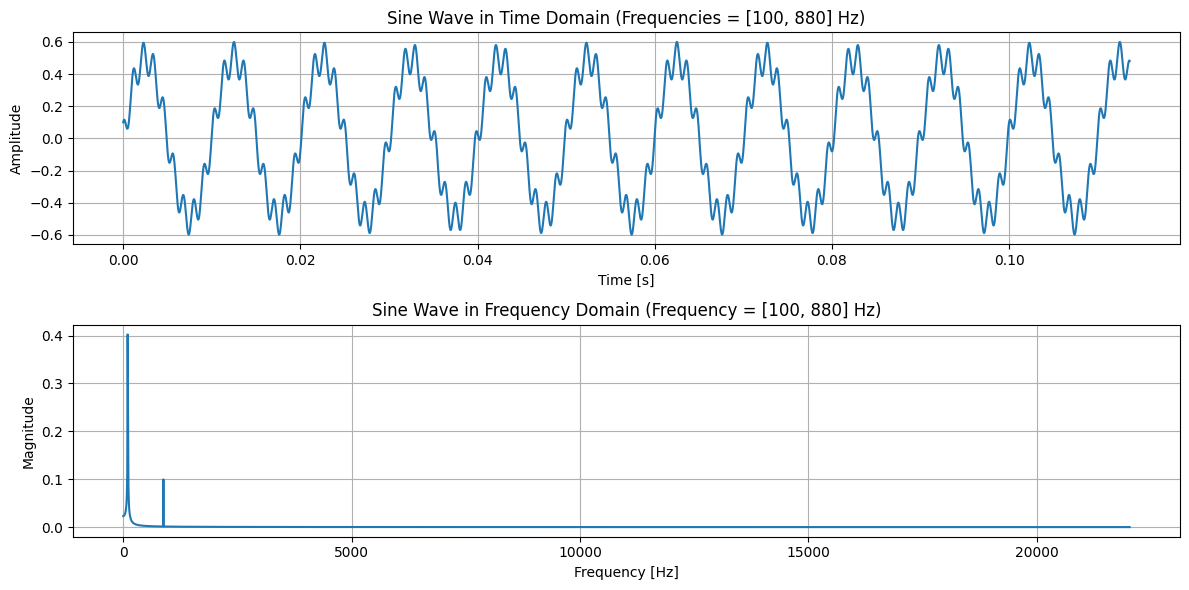

In [3]:
frequencies = [100, 880]
amplitude = [0.5, 0.1]
phases = [0, 90*np.pi/180] # Phase is in radians

sample_rate = 44100 # Example of normal sampling rate for computers: 44.1 Khz
# sample_rate = 2 * max(frequencies) # Example of 'almost good enough sampling rate' 2*nyquist rate
# sample_rate = 1000 # Example of bad sampling rate - insufficient to capture all frequencies

# Reccomended to use play_sine_wave_sounddevice here, as there are problems with ipython.display.Audio when we use lower sampling rates...
# play_sine_wave(frequencies=frequencies, amplitudes=amplitude, phases=phases, duration=2, sample_rate=sample_rate)
play_sine_wave_sounddevice(frequencies=frequencies, amplitudes=amplitude, phases=phases, duration=2, sample_rate=sample_rate)

plot_sine_wave(frequencies=frequencies, amplitudes=amplitude, phases=phases, duration=None, sample_rate=sample_rate)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">



### Exercise 1 - Sampling with the Nyquist rate

Let two analog signals $x_{a1}$ and $x_{a2}$ be described by individual harmonic oscillators. 

$x_{a1}(t)$ has amplitude $A_1 = 1$, frequency $F_1 = \frac{1}{8}$ and  phase $\theta_1 = 0$,

$x_{a2}(t)$ has amplitude $A_2 = 1$, frequency $F_2 = \frac{7}{8}$ and  phase $\theta_2 = \pi$. 

#### **1.1. Write the mathematical representation of the two analog signals**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Here, we use the form in the top of the notebook: $x(t) = A \sin(F2\pi t + \theta)$:

$$x_{a1}(t) = 1 \cdot \sin(\frac{1}{8}2\pi t + 0)$$

$$x_{a2}(t) = 1 \cdot \sin(\frac{7}{8}2\pi t + \pi)$$

We could shorten this, but we might also be kinda lazy...

</span>



#### **1.2. For both signals, what is the minimum sampling rate (Nyquist rate) to avoid aliasing?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

For both signals, we have the Nyquist rate as $F_{s} > F_s $, meaning it is:

$$F_s = \frac{2}{8}$$
$$F_s = \frac{14}{8}$$

For $x_{a1}$ and $x_{a2}$ respectively. Remember that to avoid aliasing, we need to have a sample rate *above* this value


</span>



#### **1.3. For both signals, what is the discrete signal obtained with the sampling rate $F_s = 3$ hertz?**


<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

In both cases, we have that the sampling rate $F_s = 3$. This is above the nyquist rate, which is $\frac{14}{8}$ at the highest. As such, when we sample, we should be able to recreate the analog signal perfectly. But for good measure, lets just write up the two digital signals

Here, we use the form of the digital signal in the top of the notebook: $x_d(n) = A \sin\left(2\pi\frac{F}{F_s}n + \theta\right)$

$$x_{d1}(n) = 1 \cdot \sin(2\pi \frac{\frac{1}{8}}{3}n + 0)$$

$$x_{d2}(n) = 1 \cdot \sin(2\pi \frac{\frac{7}{8}}{3}n + \pi)$$

Again, we could shorten this, but we might be feeling lazy.

</span>

#### **1.4. 💻 The code below creates and plots samples of both $x_{a1}$ and $x_{a2}$. Use this, to verify that $x_{a1}$ is an alias for $x_{a2}$ when the sample frequency is 1 hertz. Change the sampling frequency, what do you see when the sampling frequency is high enough to prevent aliasing?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Changing the sampling frequency to 2, for example $2 > \frac{14}{8}$, we can see that more points are placed along both signals. They still overlap in some points, but $x_{d2}$ no longer shares *all* points with $x_{a1}$. If this was the real world, and we did not know $F_1$, we might still be afraid of aliasing, but we would at least know that $F_2$ does not appear as an alias of $x_{d2}$

</span>


#### **1.5. 💻 Change the subsampling frequency to be exactly the nyquist rate, so $F_s = 2F$ for each of the signals... what happens now?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Setting the subsampling frequency to either $\frac{2}{8}$ or $\frac{14}{8}$, perfectly places samples along the 0-line of both analog signals. The sampled digital signal, therefore appears to be a clean $0$... not good if we want to reconstruct the analog signal; then again.

Usually here you say you extract the DC-component of the signal. That is, the average value which the signal oscillates around. Interestingly enough, a DC component equates to having a kind of 'zero frequency'.

</span>



</span>

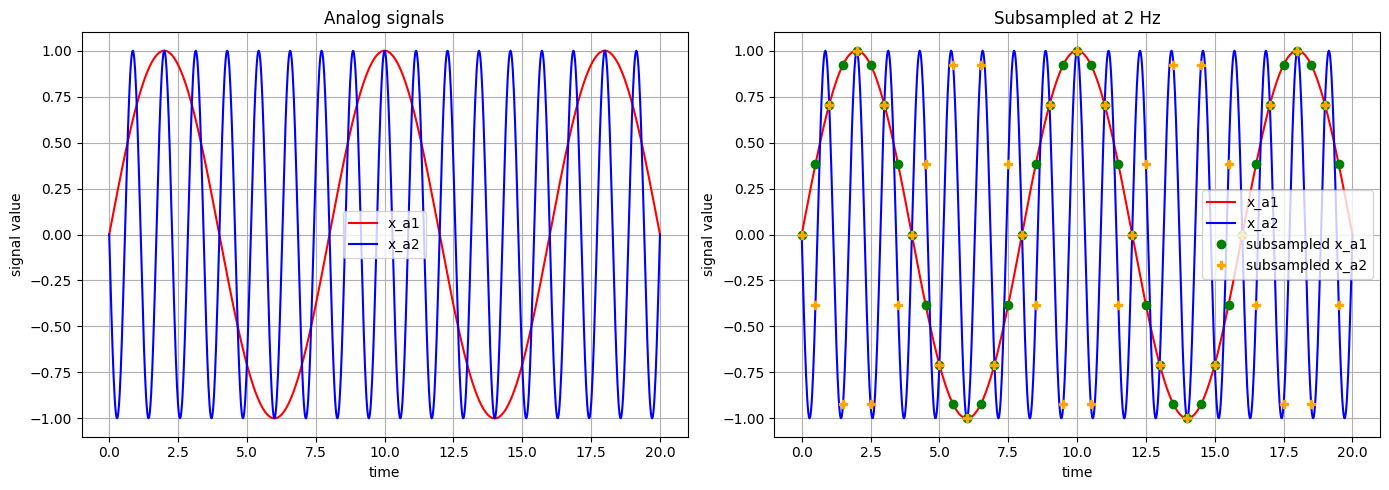

In [14]:
def sine_wave_function(time, amplitude, frequency, phase):
    signal = amplitude * np.sin(2 * np.pi * frequency * time + phase)
    return signal

# Define signal parameters
amplitude_1 = 1
signal_frequency_1 = 1/8
phase_1 = 0

amplitude_2 = 1
signal_frequency_2 = 7/8
phase_2 = np.pi

# Create 'analog' signals. Technically, these are digital, but since we use np.linspace with such a large N here, it appears perfectly analog...
N = 1000
init_point = 0
end_point = 20
time = np.linspace(init_point, end_point, N)
x_a1 = sine_wave_function(time, amplitude_1, signal_frequency_1, phase_1)
x_a2 = sine_wave_function(time, amplitude_2, signal_frequency_2, phase_2)

# Subsampling, so sample the 'analog' signals using the sampling rate
subsampling_frequency = 2
sampled_time = np.arange(init_point, end_point, 1 / subsampling_frequency)
subsampled_signal_x_a1 = sine_wave_function(sampled_time, amplitude_1, signal_frequency_1, phase_1)
subsampled_signal_x_a2 = sine_wave_function(sampled_time, amplitude_2, signal_frequency_2, phase_2)

# Plot first the analog signals, and then the analog signals with the subsampled digital points
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: analog signals
axs[0].plot(time, x_a1, color='red', label='x_a1')
axs[0].plot(time, x_a2, color='blue', label='x_a2')
axs[0].set_title('Analog signals')
axs[0].set_xlabel('time')
axs[0].set_ylabel('signal value')
axs[0].legend()
axs[0].grid()

# Right plot: subsampled signals
axs[1].plot(time, x_a1, color='red', label='x_a1')
axs[1].plot(time, x_a2, color='blue', label='x_a2')
axs[1].plot(sampled_time, subsampled_signal_x_a1, 'o', color='green', label='subsampled x_a1')
axs[1].plot(sampled_time, subsampled_signal_x_a2, 'P', color='orange', label='subsampled x_a2')
axs[1].set_title(f'Subsampled at {subsampling_frequency} Hz')
axs[1].set_xlabel('time')
axs[1].set_ylabel('signal value')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

## Orthonormal periodic basis functions

The idea of Orthonormal periodic basis functions is essentially to introduce a change of basis in the sinusoidal signals. We typically work with. Essentially, the most interesting numbers in most any signal, is the **frequency** and the **amplitude** associated with that frequency. We therefore want a basis which, given samples of a sinusoidal signal, can tell us what analog signal with what frequencies at what amplitudes created those samples. 

---

Let us consider signals sampled on the interval $n \in [0,N-1]$. The **fundamental frequency (the lowest frequency sine wave in that signal)** functions are given by:


$$f_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( 2\pi \frac{1}{N}n \right)  $$

$$g_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left( 2\pi \frac{1}{N}n \right)  $$

These are periodic with $f_1(n+N)=f_1(n), \ g_1(n+N)=g_1(n)$. 

The **higher harmonics (integer multiples of the fundamental frequency)** are given by

$$f_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left(2\pi  \frac{k }{N}n \right) $$

$$g_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left(2\pi  \frac{k }{N}n \right)  $$

These are periodic with $f_k(n+\frac{N}{k})=f(n), \ g_k(n+\frac{N}{k})=g_k(n)$, i.e. their frequencies are $k$ times higher than the fundamental frequency.

Notice, that the constant $\frac{\sqrt{2}}{\sqrt{N}}$ serves to normalize the length of the basis vectors to have unit length.

The range of $k$'s (how many harmonics we can represent), is $k=[0,N/2]$ for even $N$ and $k=[0,(N-1)/2]$ for odd. With $k=0$ we get the constant function

$$f_0(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( \frac{2\pi 0}{N}n \right) = \frac{\sqrt{2}}{\sqrt{N}} $$

So in total we have precisely $N$ discrete sampled harmonic functions or vectors $\mathbf{v}_n$ if they are visualized as points in $\mathbb{R}^N$.

*The first vector $\mathbf{v}_0$ is the constant vector:*
$$(\mathbf{v}_0)_n = \frac{\sqrt{2}}{\sqrt{N}}$$

*The vectors $\mathbf{v}_1, \mathbf{v}_3, ...$ are the cosine-vectors and the vectors $\mathbf{v}_2, \mathbf{v}_4, ...$ are the sine-vectors:*

$
\begin{align}
(\mathbf{v}_{2k-1})_n &= f_{k}(n) \\
(\mathbf{v}_{2k})_n &= g_{k}(n) 
\end{align}
$

for $k = 1, 2, ..., N/2$.

*We have a complete orthonormal basis set! We can form a **basis matrix** $\boldsymbol{V}=\left( \mathbf{v}_0 \quad \mathbf{v}_1 \quad \mathbf{v}_2 \quad ... \quad \mathbf{v}_{N-1} \right)^T$ where $\|\mathbf{v}\|=1$.*

---

Stepping away from the mathematics, what this means, is that we can construct a basis $V$, which works by having one fundamental frequency, and then up to $\frac{N}{2}$ extra multiples of those frequencies.

Whenever we take a set of digital samples generated from an analog signal, and project into this basis, it will try to represent the samples as the frequencies and amplitudes of the analog signal that made those samples. For example, if someone has the analog signal:

$$x_a(t) = 2\sin(4\cdot 2 \pi t) + 5\sin(6\cdot 2 \pi t)$$

And we sampled this to get the samples (of the digital signal)

$$\text{samples}_{x_d} = [ 0.0  ,   5.947 , 5.931 , 0.37 , -4.841  , -5.0  ,  -1.037 ,  2.721 ,  3.58 ,   2.143
  0.0  ,  -2.143 , -3.58 ,  -2.721 , 1.037 , 5.0   ,  4.841 , -0.37 , -5.931 , -5.947, \dots]$$

Well, with the correct basis, we could **from these samples alone**, get the following information:

- The samples were generated by a signal with two sine waves
- One sine wave had frequency 4 with amplitude 2
- The other sine wave had frequency 6 with amplitude 5

This is assuming that our fundamental frequency is perfectly created, so that both 4 and 6 are perfect integer harmonics. If there was a third frequency, not a perfect harmonic of the fundamental frequency, its 'energy' (amplitude, kinda) would be scattered along the other basis functions, and lead to a slight error, but we will see a lot of more this next week when we introduce the fourier transform.


</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">



### Exercise 2 - Changing domains

In this exercise, we will consider the following simulated, analog signal:

$$f(n) = \cos\left(2\pi \frac{0.15}{fs}\right) + \frac12 \cos\left(2\pi \frac{1}{fs}\right) + \frac{1}{4} \cos\left(2\pi \frac{2}{fs}\right)\tag{1}$$

However, instead of observing the signal $f(n)$ directly, we assume we only have access to a noisy version of $f$:

$$y(n) = f(n) + \epsilon_n,\tag{2}$$

where $\epsilon_n \sim \mathcal{N}(0, 0.5^2)$.

We want to simulate this noisy signal, create an orthonormal periodic basis matrix, and then project our noisy signal unto this matrix. This can be done simply by projecting our vector of the observed signal $y$ unto the orthonormal periodic basis matrix $V$:

$$\mathbf{z} = \mathbf{V}^T \mathbf{y}$$

We recall then, that the coefficients of $\mathbf{z}$ are ordered as follows

$$\mathbf{z} = \left[a_0 \quad a_1 \quad b_1 \quad a_2 \quad b_2 \quad ... a_{K} \quad b_{K}\right]^T$$

where we then assume that we can represent our signal $y$ in terms of these periodic basis functions

$$\begin{align*}
		y(n) &= a_0 + a_1\cos(2\pi \frac{1}{N} n) + b_{1}\sin(2\pi \frac{1}{N} n)+ a_2\cos(2\pi \frac{2}{N} n) + b_{2}\sin(2\pi \frac{2}{N} n) + ...\\
		&= a_0 + \sum_{k=1}^K  \left[a_k\cos(2\pi \frac{k}{N} n) + b_k\sin(2\pi \frac{k}{N} n)\right]\\
		\end{align*}
$$

#### **2.1. 💻 Complete the cell below to implement the signal using numpy. Visualize this, what does the noise add in terms of specific frequencies or amplitudes?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

It doesn't add much, tbh. Not useful information anyway. You can almost say, that the random oscillations make it look as though we have added a bunch of extra frequencies to the signal, all with varying amplitude. This should also be reflected in our harmonic basis function...

</span>


#### **2.2. 💻 Complete the function two cells below, `create_basis` to set up a orthonormal periodic basis for a signal**

#### **2.3 💻 Complete the function `project_signal_to_basis` it should be able to project our signal samples to the created orthonormal periodic basis function**

#### **2.4 Inspect the stem plot of the created z vector. What do you think the highest stems represents?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The highest stems correspond to basis functions (frequencies) with the highest amplitudes. IN our case, this is the sinusoid with frequency $0.15$, which has an amplitude of 1. It doesn't exactly translate to amplitude, since we haven't normalized yet, but we'll do that later...

</span>


#### **2.5 How do you think the stem plot would look if we did not add noise to the original signal?**


<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

You can quickly test this out by just not adding the noise. Basically, we would get far fewer stems. Why not exactly 3? Probably because in our case, the frequencies in our signal, are not perfect harmonics of the fundamental frequency in our basis, so their amplitude kinda gets "scattered" across the sorrounding frequencies. Even so, when removing noise, most of the other frequencies are removed.

</span>

#### **2.6 What do you think is the point of only plotting the first 100 coefficients of the z vector??**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

This is both a special case for this task, and also a general learning example: We do not want to represent the frequencies that are only due to noise. 

Noise makes it seem as though there are many more frequencies in our signal than there actually are, so we don't really want to plot them. In this case, we know most of our frequencies of note, are long before 100, so that's why we only keep those.

The same is true in general cases, if we know there is some band of frequencies in which our signal is unlikely to exist, it doesn't make sense to plot those frequencies, as they will most likely be only due to noise. Of course, this advice should be taken with a grain of salt, as we never reallly know where the true signal might lie...

</span>


 </span>

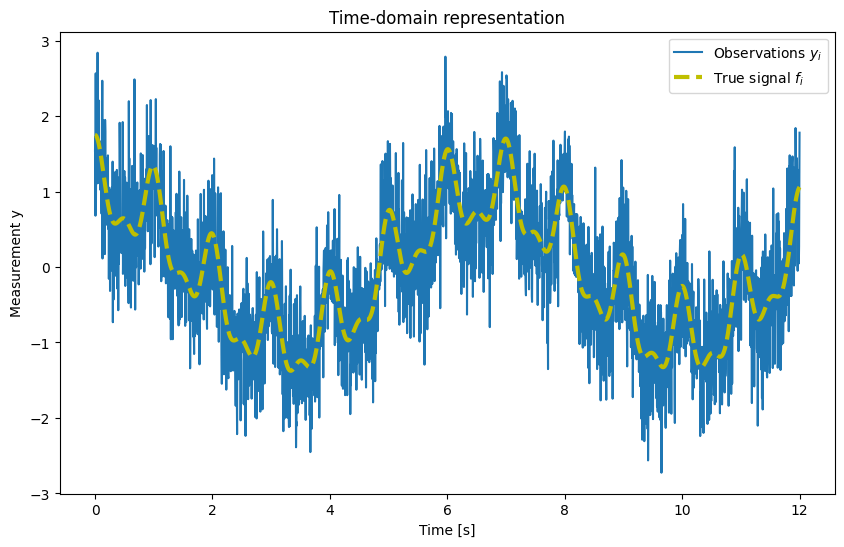

In [5]:
np.random.seed(2)

# length
N = 3001

# sample rate
fs = 250

# time vector
ns = np.arange(N)
ts = ns/fs

# create f
A0 = [1, 0.5, 0.25]
f0 = [0.15, 1, 2]
f = np.zeros(N)
for ai, fi in zip(A0, f0):
    f += ai*np.cos(2*np.pi*fi/fs*ns)
    
# simulate noisy observations
noise = np.random.normal(0, 0.5, size=N)
y = f + noise


fig = plt.figure(figsize=(10, 6))
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f, 'y--', linewidth=3, label='True signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend();

In [ ]:
# make sure we have an odd number N
def create_basis(N):
    """
    Projects the input signal y onto an orthonormal basis V.

    Parameters
    ----------
    V : ndarray of shape (N, N)
        Orthonormal basis matrix where each column is a basis vector.
    y : ndarray of shape (N,)
        Input signal to be projected.

    Returns
    -------
    z : ndarray of shape (N,)
        Coefficients of y in the basis V.
    """


    # Ensure that N is odd, otherwise we might have problems
    assert N % 2 == 1
    
    # Initiailize an empty matrix to hold our V
    # Remember, we can access the i'th column (vector) in our basis matrix by indexing like so: V[:,i] 
    ns = np.arange(N)
    V = np.zeros((N,N))
        
    # First basis vector, remember this is simply a constant throughout
    V[:, 0] = np.ones(N)

    # Scale first basis vector individually, since it should not be scaled by sqrt(2)
    V[:, 0] = V[:, 0] / np.sqrt(N) 
    
    # Get how many pairs of basis vectors we have, remember that N here is odd
    num_pairs = int((N-1)/2)

    # Create the remaining basis vectors
    for k in range(1, num_pairs + 1):
        # in each column we are going to define cosine or sine function with frequency k
        V[:, 2*k-1] = np.cos(2*np.pi * (ns / N) * k) ## at each step we are filling this is a column
        V[:, 2*k] = np.sin(2*np.pi * (ns / N) * k)
    
    # scale all of the not-first basis vectors at once
    V[:, 1:] = V[:, 1:] * (np.sqrt(2) / np.sqrt(N))
    return V

def project_signal_to_basis(V, y):
    """
    Projects the input signal y onto the orthonormal basis V.

    Parameters
    ----------
    V : ndarray of shape (N, N)
        Orthonormal basis matrix where each column is a basis vector.
    y : ndarray of shape (N,)
        Input signal to be projected.

    Returns
    -------
    z : ndarray of shape (N,)
        Coefficients of y in the basis V, representing y in the new basis.
    """
    # Project y unto V matrix
    z = V.T @ y
    return z

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\oscar\AppData\Local\Temp\ipykernel_29548\4148374377.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.title('All coefficients of $\mathbf{z}$')
C:\Users\oscar\AppData\Local\Temp\ipykernel_29548\4148374377.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.title('First 100 coefficients of $\mathbf{z}$');


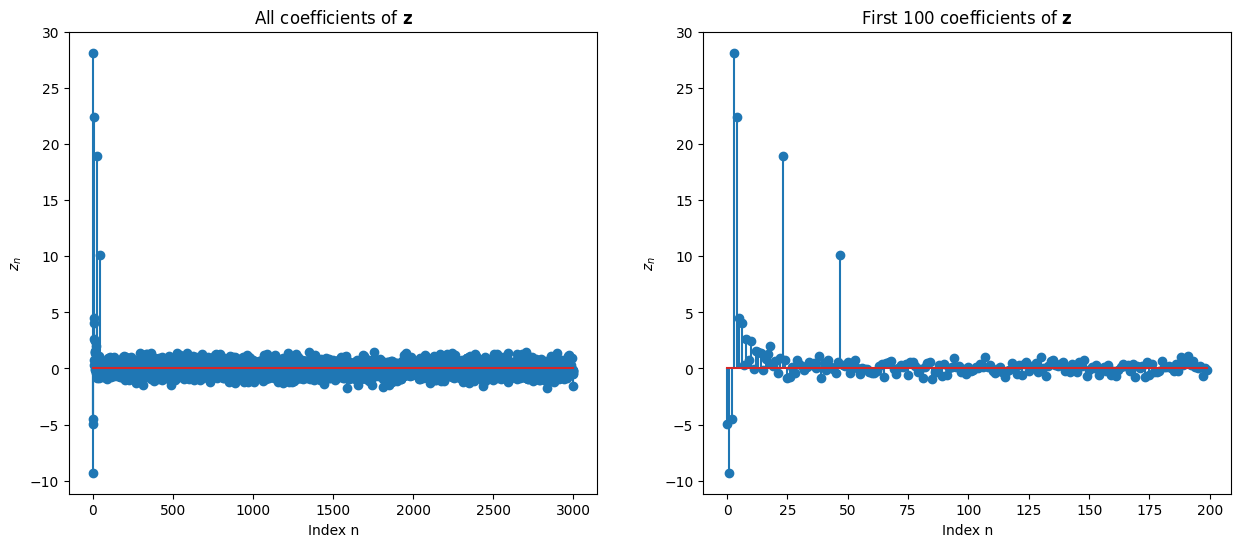

In [7]:
# Create the basis
V = create_basis(N)

# Project our simulated signal unto it
z = project_signal_to_basis(V, y)


# Plot the z's coefficients
plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
plt.stem(z)
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('All coefficients of $\mathbf{z}$')

# Plot the first 100 coefficients of z
plt.subplot(1, 2, 2)
plt.stem(z[:200])
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('First 100 coefficients of $\mathbf{z}$');


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 3 - Computing the energy of the signal

The energy of a signal from $n=0$ to $N$ is given by

$$E = \sum_{n=0}^N f(n)^2$$

We have seen that the energy can be computed in the time-domain as well as in the frequency-domain with the same result.

#### **3.1. 💻 Complete the cell below to calculate the energy of the $y$ signal from before in both the time domain (so the original signal) and the frequency domain (after projecting to our V matrix). Explain the result:**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

They're the same!

The energy of a signal is essentially how strong its oscillations are, the longer the waves reach "out" from the middle, the higher the energy.

Since the frequency domain, so when our signal is projected unto the $\mathbf{V}$ matrix, contains our signal's amplitudes perfectly, there is no difference in the energy from time to frequency - this is really useful

</span>

</span>

In [8]:
E_time = np.sum(y**2)
E_freq = np.sum(z**2)

print('Energy (time  domain): %3.2f' % E_time)
print('Energy (freq. domain): %3.2f' % E_freq)

Energy (time  domain): 2700.86
Energy (freq. domain): 2700.86


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 4 -  computing the amplitude spectrum


It is often more convenient to combine the cosine and sine pair for each frequency into a single harmonic function as follows:

$$
\begin{align*}
		y(n) &= a_0 + \sum_{k=1}^K  c_k \cos\left(2\pi \frac{k}{N} n + \phi_k\right)
		\end{align*},
$$

where $c_k = \sqrt{a_k^2 + b_k^2}$ and $\tan \phi_k = \frac{a_k}{b_k}$.



Therefore, we will now compute the amplitude spectrum $c_k = \sqrt{a^2_k + b^2_k}$ for $k \geq 1$ and $c_k = a_0$ for $k = 0$, where $a_k$ and $b_k$ are the coefficients for the $k$'th pair of cosine and sine functions, respectively.

For convenience we will now define the function ***compute_spectrum***, which takes a signal ***y*** and a matrix function matrix ***V*** and returns the amplitude spectrum

Two cells below, we use grab the top 3 frequencies from our frequency domain, and use these to reconstruct the original signal

#### **4.1. Why do you think it makes sense to calculate the amplitude spectrum as opposed to just keeping it as it is in the orthonormal basis functions?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The amplitudes more directly correspond to how the signal is created. The "loss" of having both sine and cosines doesn't really matter, since the difference between them is just $\pi$

</span>

#### **4.2. Can you make out the amplitude and frequencies of our original signal from the amplitude spectrum?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Yes, looking at the three tallest stalks, we now directly can make out the frequencies in our original signal as being somewhere around 0.1 with amplitude somewhere around 0.9, frequency 1 with amplitude around 0.5, and frequency 2 with amplitude around 0.25.

</span>


#### **4.3. To reconstruct our signal, we use cosine (np.cos), what do you think would happen if we use sine? Why do you think this difference is not important in practicality**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The difference between sine and cosine is just a phase of $\pi$. Meaning if we used cosine where we should have used sine, or vice versa, we could always adjust the phase to get closer to our original signal. Overall, it would contribute an inaccuracy, but not a significant one.

</span>



#### **4.4. Notice that when we plot the frequencies that are included in the reconstructed signal, they are actually $0.1666, 0.9996$, and $0.083$ with amplitude $0.93, 0.49$, and $0.26$ respectively. Why are they this, as opposed to the original frequencies of $0.15, 1, 2$ and original amplitudes of $1, 0.5, 0.25$ respectively?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Mainly two reasons:
- Noise, the noise should only add amplitude to each frequency, this appears to be the case for frequency 2 for example (0.26 is higher than 0.25). 
- 'Spectral leakage' - You'll learn more about this next week. Basically it's when the frequencies represented in our harmonic basis does not perfectly correspond to the frequencies in the actual signal, with no way of perfectly representing the frequencies, the mathematics basically resort to 'throwing' the amplitude across the nearest frequencies, making it seem like there are more frequencies than there actually are. 

</span>

#### **4.5. In this task, we know the original, denoised signal has 3 frequencies. Say we didn't know the original signal, but were only given the samples, and perhaps the amplitude spectrum. How would you choose how many of the top frequencies to include in the reconstruction?**   

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

In this case, you *could* use a sort of "forward selection" approach. Start with a low number of frequencies, and work your way up until the amplitude in the frequencies added becomes small enough, to either be noise, or unimportant for the signal of note. 

In other words, guesswork and feel... though there are probably machine learning or purely statistical methods to make these guesses informed... 

</span>

</span>


Text(0.5, 1.0, 'Amplitude spectrum from 0Hz to 10Hz')

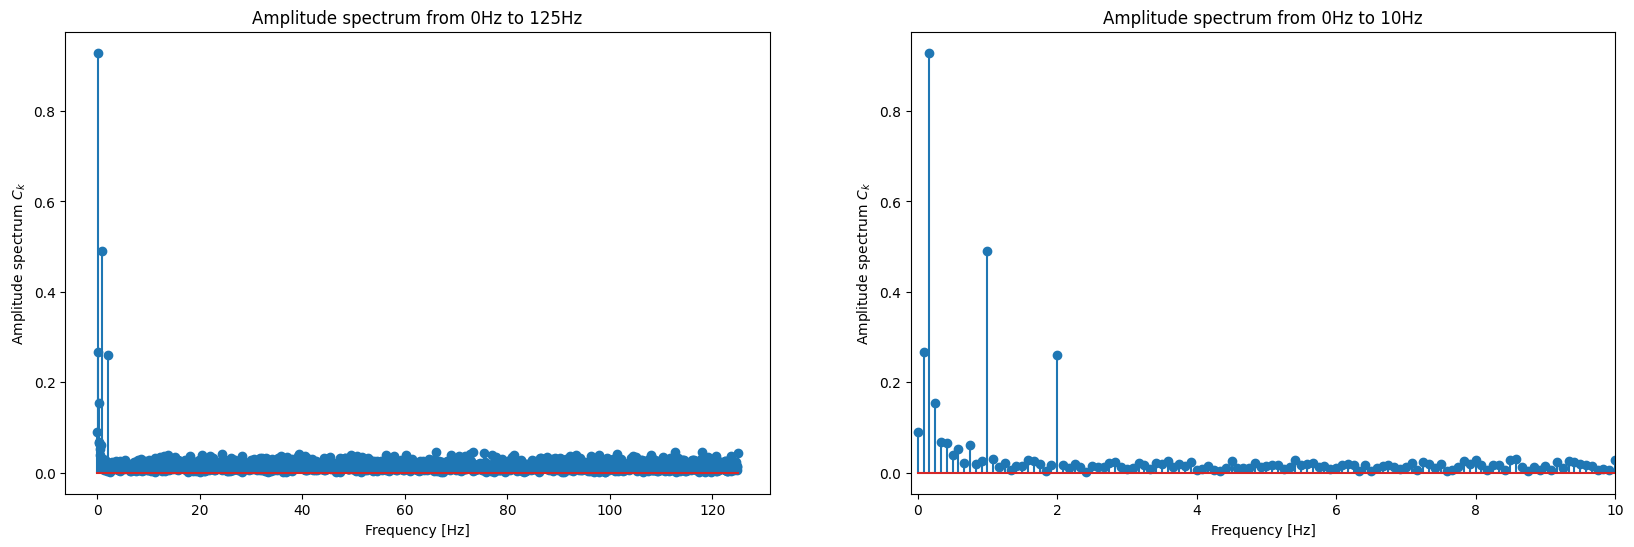

In [ ]:
def compute_spectrum(y, V, scale=True):
    """
    Computes the amplitude spectrum of a signal projected onto a harmonic basis.

    Parameters
    ----------
    y : ndarray
        The input signal (1D array).
    V : ndarray
        The harmonic basis matrix (2D array).
    scale : bool, optional
        Whether to scale the amplitudes based on the size of the basis matrix (default is True).

    Returns
    -------
    amp_spectrum : ndarray
        The amplitude spectrum of the signal.
    """

    # Project our signal to our harmonic basis
    z = V.T@y

    # Get all the odd-numbered columns (as cosine) and all the even-numbered columns (as sine)
    z_cos = z[2::2]
    z_sin = z[1::2]

    # Compute the amplitude spectrum - the magnitude of the cos- and sine vectors
    amp_spectrum = np.sqrt(z_cos**2 + z_sin**2)

    # Stack the new amplitude vectors horizontally to create our spectrum
    amp_spectrum = np.hstack((np.abs(z[0]), amp_spectrum))
    
    # Optional option to scale the amplitudes based on the size of the basis matrix
    if scale:
        N = len(y)
        scales = np.ones(len(amp_spectrum))
        scales[0] = 1
        scales[1:] = np.sqrt(2)
        
        scales = scales/np.sqrt(N)

        return scales*amp_spectrum
    else:
        return amp_spectrum

freqs = np.arange(int(0.5*N)+1)*fs/N

amplitude_spectrum = compute_spectrum(y, V, scale=True)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.stem(freqs, amplitude_spectrum)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 125Hz')

plt.subplot(1, 2, 2)
plt.stem(freqs, amplitude_spectrum)
plt.xlim(-0.1, 10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 10Hz')

Amplitude: 0.9288487857838613 Frequency:  0.16661112962345884
Amplitude: 0.49022230798572464 Frequency:  0.9996667777407531
Amplitude: 0.2666607440232839 Frequency:  0.08330556481172942


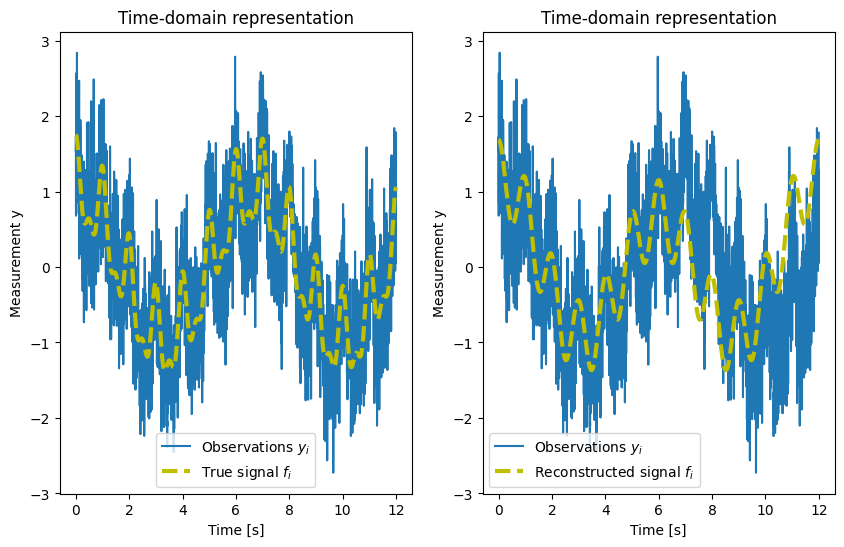

In [10]:
# Number of frequencies to grab
top_n = 3

# np.argsort returns the indices, sorted in ascending order based on their respective values
top_indexes = np.argsort(amplitude_spectrum)[::-1]

A1 = amplitude_spectrum[top_indexes[:top_n]]
freqs_1 = freqs[top_indexes[:top_n]]

# Recreate the original signal based on the top frequencies
f1 = np.zeros(N)
for ai, fi in zip(A1, freqs_1):
    print(f"Amplitude: {ai} Frequency:  {fi}")

    f1 += ai*np.cos(2*np.pi*fi/fs*ns)
    

# Plot the original signal
fig = plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f, 'y--', linewidth=3, label='True signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend()

# Plot the reconstructed signal
plt.subplot(1, 2, 2)
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f1, 'y--', linewidth=3, label='Reconstructed signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend()
plt.show()

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

### $\star$ Exercise 5 - Reconstruction of signals

A properly sampled continuous-time sinusoidal signal can be reconstructed from the samples using the sinc interpolation formula: $$x_a(t) = \sum_{n=-\infty}^{\infty} x_d(n) \text{sinc}\left( \dfrac{t-nT}{T}\right),$$
where $x_d(n)$ is the sampled value for the $n$'th sample, where it is assumed that the sample is collected at time $nT$, with sample $n=0$ collected at $t=0$.
Here, the normalized cardinale sine function is defined  as: $\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} $, with $x\neq 0$ and $\text{sinc}(0) = 1$. In python the sinc function is available as $\texttt{np.sinc}$. 

In order to reconstruct the signal perfectly, the formula assumes that data is collected on the entire span of the signal domain, which in practice is of course not possible. However, as we will see in the exercises, for limited data the signal can still be approximated for the time interval where data is present. 

#### **5.1 Inspect the code and see how it approximates the reconstruction given by the sinc interpolation formula.  Notice how the reconstructed value at time $t$ is based on all $N$ data points as $$x_r(t) = \sum_{n=0}^{N-1} x(n) \text{sinc}\left( \dfrac{t-nT}{T}\right)$$ where $x(n)$ is the sampled value for the $n$'th sample, when it is assumed that the sample is collected at time $nT$, with sample $n=0$ collected at $t=0$.**

#### **5.2 For different sampling frequencies, the code samples the signal $x_{a2}$ and plot the sample points together with the wave function. Also, the interpolation function is used to reconstruct the signal from data and plot the reconstructed signal.**

#### **5.3 Try different sampling frequencies, both below and above the Nyquist rate. For instance you can try $F_s = 1$, $F_s = 3$ and $F_s = 0.75$. Compare and comment on your experiments.**

#### **5.4. For $F_s = 1$, verify that the reconstruction is the alias $x_{a1}$.**

#### **5.5 Try to use linear interpolation instead of sinc interpolation. Comment on what sampling rate you then need for the reconstructed wave to look 'smooth'?**

#### **5.6. For both sinc and linear interpolation, investigate what happens if you try to reconstruct the signal outside the time range supported by the sampled data.**

</span>


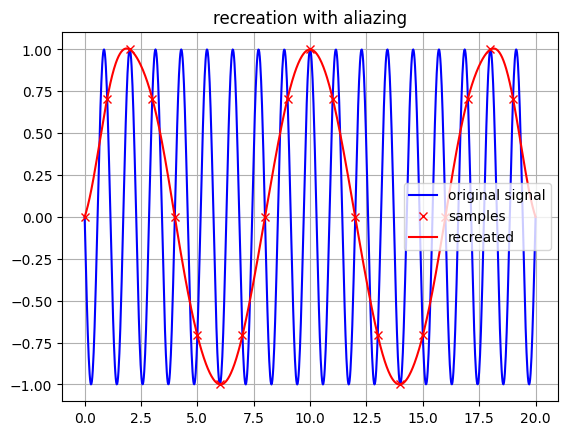

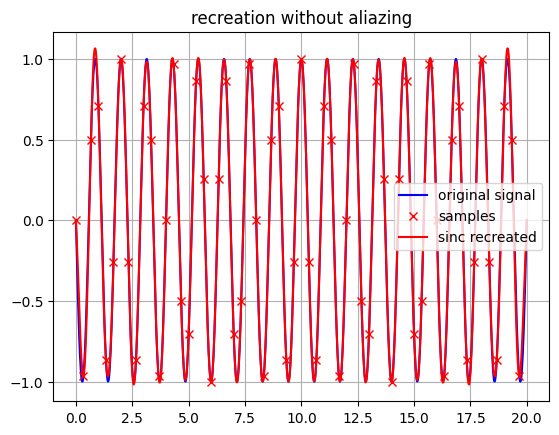

In [11]:
#reconstruct signal from samples using sinc interpolation

#function for reconstructing siganal at a single time point
def sinc_interpolate_one_value(sampled_signal, period, new_t):
    T = period
    new_y = 0
    for n in range(len(sampled_signal)):
        new_y += sampled_signal[n] * np.sinc((1/T)*(new_t-n*T))
    return new_y

#function for performing sinc interpolation
#sampled_signal: the sampled values
#period: the subsampling period 'T'
#new_times: new time points, used to reconstruct the signal 
#           (use a high number to create a smooth signal)
def sinc_interpolation(sampled_signal, period, new_times):
    reconstruced_values = []
    for t in new_times:
        reconstruced_values.append(sinc_interpolate_one_value(sampled_signal, period, t))
    return np.array(reconstruced_values)

#function for subsampling x_a2
def subsampling_x_a2(sampling_frequency):
    subsampling_frequency = sampling_frequency
    sampled_time = np.arange(init_point, end_point, 1/subsampling_frequency)
    subsampled_signal_x_a2 = sine_wave_function(sampled_time, amplitude_2, signal_frequency_2, phase_2)
    return subsampled_signal_x_a2, sampled_time


frequency_1hertz = 1
period_1hertz = 1.0/frequency_1hertz
sample_1hertz, time_1hertz = subsampling_x_a2(frequency_1hertz)
recreated_1hertz = sinc_interpolation(sample_1hertz,period_1hertz,time)
plt.plot(time, x_a2, color='blue', label='original signal')
plt.plot(time_1hertz, sample_1hertz, 'rx', label = 'samples')
plt.plot(time, recreated_1hertz, 'r-', label = 'recreated')
#remove comment to show linear interpolation
#plt.plot(time_1hertz, sample_1hertz, 'g-', label = 'linear recreated') #show linear interpolation
plt.legend()
plt.title('recreation with aliazing')
plt.grid()
plt.show()

frequency_3hertz = 3
period_3hertz = 1.0/frequency_3hertz
sample_3hertz, time_3hertz = subsampling_x_a2(frequency_3hertz)
recreated_3hertz = sinc_interpolation(sample_3hertz,period_3hertz,time)
plt.plot(time, x_a2, color='blue', label='original signal')
plt.plot(time_3hertz, sample_3hertz, 'rx', label = 'samples')
plt.plot(time, recreated_3hertz, 'r-', label = 'sinc recreated')
#remove comment to show linear interpolation
#plt.plot(time_3hertz, sample_3hertz, 'g-', label = 'linear recreated') #show linear interpolation
plt.legend()
plt.title('recreation without aliazing')
plt.grid()
plt.show()